# DATA CLEANING

In [1]:
import numpy as np 
import pandas as pd

## Importing the CSV File

> > #### NOTE -> This dataframe was of 20th March 2022.

In [2]:
file = pd.read_csv('WebScraping.csv')

In [3]:
file.head()

,Unnamed: 0,Company_Name,Sector,Share_Name,Current_Price,Price_Change,Percentage_Change,Opening_Price,Previous_Close,Volume,High,Low,Upper_Circuit,Lower_Circuit,High_52,Low_52,Face_Value,Market_Capital,State,Website
0,0,3M India Ltd.,Diversified,3MINDIA,"20,026.75",347.60,1.77%,"19,900.00","19,679.15","12,906.00","20,249.80","19,738.75","23,614.95","15,743.35","31,000.00","19,433.75",10.0,"22,560",Karnataka,http://www.kfintech.com
1,1,Aarti Drugs Ltd.,Pharmaceuticals,AARTIDRUGS,454.85,6.25,1.39%,450.00,448.60,"137,244.00",463.60,450.00,538.30,358.90,841.80,437.35,10.0,"4,212",Maharashtra,http://www.linkintime.co.in
2,2,Aarti Industries Ltd.,Chemicals,AARTIIND,891.60,32.15,3.74%,875.00,859.45,"1,550,992.00",898.55,868.50,945.35,773.55,"1,168.00",596.28,5.0,"32,321",Gujarat,http://www.linkintime.co.in
3,3,AAVAS Financiers Ltd.,Finance - General,AAVAS,"2,489.85",46.60,1.91%,"2,475.00","2,443.25","142,815.00","2,506.65","2,400.05","2,931.90","1,954.60","3,340.00","2,124.15",10.0,"19,654",Rajasthan,http://www.linkintime.co.in
4,4,Aditya Birla Capital Ltd.,Finance - Investments,ABCAPITAL,109.85,1.30,1.20%,110.00,108.55,"4,259,155.00",110.85,108.00,119.40,97.70,139.20,96.35,10.0,"26,543",Gujarat,http://www.kfintech.com


In [4]:
file.shape

(471, 20)

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         471 non-null    int64  
 1   Company_Name       471 non-null    object 
 2   Sector             471 non-null    object 
 3   Share_Name         469 non-null    object 
 4   Current_Price      469 non-null    object 
 5   Price_Change       469 non-null    float64
 6   Percentage_Change  471 non-null    object 
 7   Opening_Price      471 non-null    object 
 8   Previous_Close     471 non-null    object 
 9   Volume             471 non-null    object 
 10  High               471 non-null    object 
 11  Low                471 non-null    object 
 12  Upper_Circuit      471 non-null    object 
 13  Lower_Circuit      471 non-null    object 
 14  High_52            471 non-null    object 
 15  Low_52             471 non-null    object 
 16  Face_Value         471 non

In [6]:
# Number of NaN
file.isna().sum()

Unnamed: 0            0
Company_Name          0
Sector                0
Share_Name            2
Current_Price         2
Price_Change          2
Percentage_Change     0
Opening_Price         0
Previous_Close        0
Volume                0
High                  0
Low                   0
Upper_Circuit         0
Lower_Circuit         0
High_52               0
Low_52                0
Face_Value            0
Market_Capital        0
State                 0
Website              27
dtype: int64

## Drop "Unnamed: 0" column

In [7]:
file.drop(['Unnamed: 0'], inplace=True, axis=1)

In [8]:
file.head()

,Company_Name,Sector,Share_Name,Current_Price,Price_Change,Percentage_Change,Opening_Price,Previous_Close,Volume,High,Low,Upper_Circuit,Lower_Circuit,High_52,Low_52,Face_Value,Market_Capital,State,Website
0,3M India Ltd.,Diversified,3MINDIA,"20,026.75",347.60,1.77%,"19,900.00","19,679.15","12,906.00","20,249.80","19,738.75","23,614.95","15,743.35","31,000.00","19,433.75",10.0,"22,560",Karnataka,http://www.kfintech.com
1,Aarti Drugs Ltd.,Pharmaceuticals,AARTIDRUGS,454.85,6.25,1.39%,450.00,448.60,"137,244.00",463.60,450.00,538.30,358.90,841.80,437.35,10.0,"4,212",Maharashtra,http://www.linkintime.co.in
2,Aarti Industries Ltd.,Chemicals,AARTIIND,891.60,32.15,3.74%,875.00,859.45,"1,550,992.00",898.55,868.50,945.35,773.55,"1,168.00",596.28,5.0,"32,321",Gujarat,http://www.linkintime.co.in
3,AAVAS Financiers Ltd.,Finance - General,AAVAS,"2,489.85",46.60,1.91%,"2,475.00","2,443.25","142,815.00","2,506.65","2,400.05","2,931.90","1,954.60","3,340.00","2,124.15",10.0,"19,654",Rajasthan,http://www.linkintime.co.in
4,Aditya Birla Capital Ltd.,Finance - Investments,ABCAPITAL,109.85,1.30,1.20%,110.00,108.55,"4,259,155.00",110.85,108.00,119.40,97.70,139.20,96.35,10.0,"26,543",Gujarat,http://www.kfintech.com


## Share Name

> **Replacing 'NA'**

In [9]:
file['Share_Name'].isna().sum()

2

In [10]:
file['Share_Name'].fillna(file['Share_Name'].mode(), inplace=True)

In [11]:
file['Share_Name'].isna().sum()

0

## Current Price

> **Converting dtype**

In [12]:
file['Current_Price'].dtype

dtype('O')

In [13]:
file['Current_Price'] = pd.to_numeric(file['Current_Price'].str.replace(',',''))

In [14]:
file['Current_Price'].dtype

dtype('float64')

> **Replacing 'NA'**

In [15]:
file['Current_Price'].isna().sum()

2

In [16]:
file['Current_Price'].fillna(file['Current_Price'].mean(), inplace=True)

In [17]:
file['Current_Price'].isna().sum()

0

## Price Change

> **Replacing 'NA'**

In [18]:
file['Price_Change'].isna().sum()

2

In [19]:
file['Price_Change'].fillna(file['Price_Change'].mean(), inplace=True)

In [20]:
file['Price_Change'].isna().sum()

0

## Percentage Change

> **Converting dtype**

In [21]:
file['Percentage_Change'].dtype

dtype('O')

In [22]:
file['Percentage_Change'] = pd.to_numeric(file['Percentage_Change'].str.strip('%'))

In [23]:
file['Percentage_Change'].dtype

dtype('float64')

## Opening Price

> **Converting dtype**

In [24]:
file['Opening_Price'].dtype

dtype('O')

In [25]:
file['Opening_Price'] = pd.to_numeric(file['Opening_Price'].str.replace(',',''))

In [26]:
file['Opening_Price'].dtype

dtype('float64')

## Previous Close

> **Converting dtype**

In [27]:
file['Previous_Close'].dtype

dtype('O')

In [28]:
file['Previous_Close'] = pd.to_numeric(file['Previous_Close'].str.replace(',',''))

In [29]:
file['Opening_Price'].dtype

dtype('float64')

## Volume

> **Converting dtype**

In [30]:
file['Volume'].dtype

dtype('O')

In [31]:
file['Volume'] = pd.to_numeric(file['Volume'].str.replace(',',''))

In [32]:
file['Volume'].dtype

dtype('float64')

## High

> **Converting dtype**

In [33]:
file['High'].dtype

dtype('O')

In [34]:
file['High'] = pd.to_numeric(file['High'].str.replace(',',''))

In [35]:
file['High'].dtype

dtype('float64')

## Low

> **Converting dtype**

In [36]:
file['Low'].dtype

dtype('O')

In [37]:
file['Low'] = pd.to_numeric(file['Low'].str.replace(',',''))

In [38]:
file['Low'].dtype

dtype('float64')

## Upper Circuit

> **Converting dtype**

In [39]:
file['Upper_Circuit'].dtype

dtype('O')

In [40]:
file['Upper_Circuit'] = pd.to_numeric(file['Upper_Circuit'].str.replace(',',''))

In [41]:
file['Upper_Circuit'].dtype

dtype('float64')

## Lower Circuit

> **Converting dtype**

In [42]:
file['Lower_Circuit'].dtype

dtype('O')

In [43]:
file['Lower_Circuit'] = pd.to_numeric(file['Lower_Circuit'].str.replace(',',''))

In [44]:
file['Lower_Circuit'].dtype

dtype('float64')

## 52 Week High

> **Converting dtype**

In [45]:
file['High_52'].dtype

dtype('O')

In [46]:
file['High_52'] = pd.to_numeric(file['High_52'].str.replace(',',''))

In [47]:
file['High_52'].dtype

dtype('float64')

## 52 Week Low

> **Converting dtype**

In [48]:
file['Low_52'].dtype

dtype('O')

In [49]:
file['Low_52'] = pd.to_numeric(file['Low_52'].str.replace(',',''))

In [50]:
file['Low_52'].dtype

dtype('float64')

## Face Value

> **Converting dtype**

In [51]:
file['Face_Value'].dtype

dtype('float64')

In [52]:
file['Face_Value'] = file.Face_Value.astype(int)

In [53]:
file['Face_Value'].dtype

dtype('int64')

## Market Capital

> **Converting dtype**

In [54]:
file['Market_Capital'].dtype

dtype('O')

In [55]:
file['Market_Capital'] = pd.to_numeric(file['Market_Capital'].str.replace(',',''))

In [56]:
file['Market_Capital'].dtype

dtype('int64')

## Websites

> **Replacing 'NA'**

In [57]:
file['Website'].isna().sum()

27

In [58]:
file['Website'].fillna("Unavailable", inplace=True)

In [59]:
file['Website'].isna().sum()

0

## Result

In [60]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company_Name       471 non-null    object 
 1   Sector             471 non-null    object 
 2   Share_Name         471 non-null    object 
 3   Current_Price      471 non-null    float64
 4   Price_Change       471 non-null    float64
 5   Percentage_Change  471 non-null    float64
 6   Opening_Price      471 non-null    float64
 7   Previous_Close     471 non-null    float64
 8   Volume             471 non-null    float64
 9   High               471 non-null    float64
 10  Low                471 non-null    float64
 11  Upper_Circuit      471 non-null    float64
 12  Lower_Circuit      471 non-null    float64
 13  High_52            471 non-null    float64
 14  Low_52             471 non-null    float64
 15  Face_Value         471 non-null    int64  
 16  Market_Capital     471 non

In [61]:
file.head()

,Company_Name,Sector,Share_Name,Current_Price,Price_Change,Percentage_Change,Opening_Price,Previous_Close,Volume,High,Low,Upper_Circuit,Lower_Circuit,High_52,Low_52,Face_Value,Market_Capital,State,Website
0,3M India Ltd.,Diversified,3MINDIA,20026.75,347.60,1.77,19900.0,19679.15,12906.0,20249.80,19738.75,23614.95,15743.35,31000.0,19433.75,10,22560,Karnataka,http://www.kfintech.com
1,Aarti Drugs Ltd.,Pharmaceuticals,AARTIDRUGS,454.85,6.25,1.39,450.0,448.60,137244.0,463.60,450.00,538.30,358.90,841.8,437.35,10,4212,Maharashtra,http://www.linkintime.co.in
2,Aarti Industries Ltd.,Chemicals,AARTIIND,891.60,32.15,3.74,875.0,859.45,1550992.0,898.55,868.50,945.35,773.55,1168.0,596.28,5,32321,Gujarat,http://www.linkintime.co.in
3,AAVAS Financiers Ltd.,Finance - General,AAVAS,2489.85,46.60,1.91,2475.0,2443.25,142815.0,2506.65,2400.05,2931.90,1954.60,3340.0,2124.15,10,19654,Rajasthan,http://www.linkintime.co.in
4,Aditya Birla Capital Ltd.,Finance - Investments,ABCAPITAL,109.85,1.30,1.20,110.0,108.55,4259155.0,110.85,108.00,119.40,97.70,139.2,96.35,10,26543,Gujarat,http://www.kfintech.com


# DATA ANALYSIS

In [62]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

## 1. Rank by Market Capitalisation  

In [63]:
file["Rank"] = file["Market_Capital"].rank(ascending = False)

> **Set the Rank column as index and sorting them in ascending order**

In [64]:
file.set_index(['Rank','Company_Name'],inplace=True)

In [65]:
file.sort_values(['Rank'], ascending=True, inplace=True)
file = file[:-1]

In [66]:
file.head()

,,Sector,Share_Name,Current_Price,Price_Change,Percentage_Change,Opening_Price,Previous_Close,Volume,High,Low,Upper_Circuit,Lower_Circuit,High_52,Low_52,Face_Value,Market_Capital,State,Website
Rank,Company_Name,,,,,,,,,,,,,,,,,,
1.0,Reliance Industries Ltd.,Refineries,RELIANCE,2481.70,78.35,3.26,2432.75,2403.35,9886295.0,2497.4,2415.10,2643.65,2163.05,2751.35,1876.70,10,1678646,Maharashtra,http://www.kfintech.com
2.0,Tata Consultancy Services Ltd.,Computers - Software,TCS,3672.75,16.85,0.46,3696.60,3655.90,3600452.0,3710.0,3660.30,4021.45,3290.35,4043.00,2987.05,1,1358569,Maharashtra,https://www.tcplindia.co.in
3.0,HDFC Bank Ltd.,Banks - Private Sector,HDFCBANK,1480.05,31.90,2.20,1472.00,1448.15,7411977.0,1489.8,1470.55,1592.95,1303.35,1725.00,1292.00,1,820636,Maharashtra,http://www.datamaticsbpm.com
4.0,Infosys Ltd.,Computers - Software,INFY,1854.60,-34.80,-1.84,1923.30,1889.40,17731459.0,1923.3,1833.05,2078.30,1700.50,1953.90,1311.30,5,780182,Karnataka,http://www.kfintech.com
5.0,ICICI Bank Ltd.,Banks - Private Sector,ICICIBANK,720.10,12.10,1.71,717.80,708.00,18329844.0,725.0,716.20,778.80,637.20,867.00,531.15,2,500279,Gujarat,http://www.3i-infotech.com


## 2. Top 5 Sectors in terms of Market Capitalisation

In [67]:
file.Sector.nunique()

106

In [68]:
Groupby_Sectors = file.groupby(by=["Sector"]).sum()

In [69]:
Groupby_Sectors.sort_values(['Market_Capital'], ascending=False, inplace=True)

In [70]:
Groupby_Sectors[['Market_Capital']][:5]

,Market_Capital
Sector,
Computers - Software,3395449
Banks - Private Sector,2138690
Refineries,1926629
Pharmaceuticals,1076658
Personal Care,890935


> **Bar graph of top 5 sectors in terms of Market Capitalisation**

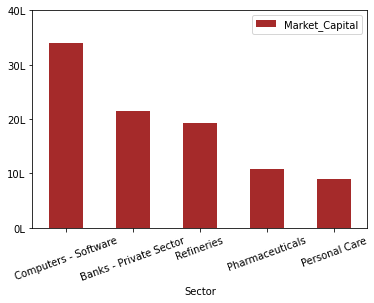

In [71]:
Groupby_Sectors[['Market_Capital']][:5].plot.bar(color={'Brown'})
plt.xticks(rotation = 20)
label = np.arange(0,5000000,1000000) 
plt.yticks(label,['0L','10L','20L','30L','40L'])
plt.show()

> > **INTERPRETATIONS** -> IT sector  is at leading the with the market capital greater than 30 Lakh Crore followed by the Private Banking with the market capital of aproximately 20 Lakh Crore

## 3. Top 5 States in Market Capital

In [72]:
file.State.nunique()

21

In [73]:
Groupby_States = file.groupby(by=["State"]).sum()

In [74]:
Groupby_States.sort_values(['Market_Capital'], ascending=False, inplace=True)

In [75]:
Groupby_States[['Market_Capital']][:5]

,Market_Capital
State,
Maharashtra,12205593
Gujarat,2585694
Delhi,2491406
Karnataka,1845906
West Bengal,921926


> **Pie chart of top 5 States in terms of Market Capitalisation**

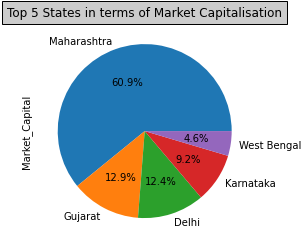

In [76]:
Groupby_States[:5].Market_Capital.plot.pie(autopct='%1.1f%%')
plt.title("Top 5 States in terms of Market Capitalisation",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

> > **INTERPRETATIONS** -> Most of the market capital are holding by the firms of Maharashtra then followed by Gujarat and then Delhi.

## 4. Top 5 most profitable shares in terms of Percentage Change

In [77]:
file.sort_values(['Percentage_Change'], ascending=False, inplace=True)

In [78]:
file[['Percentage_Change']][:5]

,,Percentage_Change
Rank,Company_Name,
425.0,IFB Industries Ltd.,13.22
286.0,KEI Industries Ltd.,12.68
262.0,Brigade Enterprises Ltd.,10.47
421.0,Greaves Cotton Ltd.,8.74
316.0,EIH Ltd.,8.45


> > **INTERPRETATIONS** -> On 20th March 2022, IFB Industries Ltd. have gained the most that is 13.22% greater than it's opening price.

## 5. Top 5 loss bearing Sectors in terms of Price Change

In [79]:
Groupby_Sectors = file.groupby(by=["Sector"]).mean()

In [80]:
Groupby_Sectors.sort_values(['Price_Change'], ascending=True, inplace=True)

In [81]:
Groupby_Sectors[['Price_Change']][:5]

,Price_Change
Sector,
Telecommunications - Equipment,-135.262500
Edible Oils & Solvent Extraction,-67.000000
Textiles - Spinning - Cotton Blended,-57.525000
Vanaspati & Oils,-26.400000
Electrodes & Graphite,-16.366667


> **Line Graph of Sectors with respect to Percentage Change**

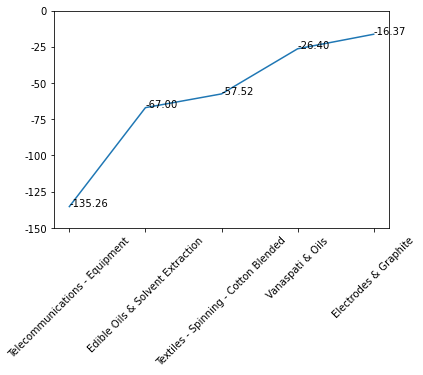

In [82]:
plt.plot(Groupby_Sectors.Price_Change[:5]) 
plt.xticks(rotation = 45)
label = np.arange(-150,1,25) 
plt.yticks(label,['-150','-125','-100','-75','-50','-25','0'])

List_of_Tuples = Groupby_Sectors['Price_Change'][:5].to_dict().items()
for i in List_of_Tuples:
    plt.annotate('{:.2f}'.format(i[1]),i)

plt.show()

> > **INTERPRETATIONS** -> On 20th March 2022, the telecommunication sector's share have lost the most which is ₹135.26 i.e., it's per share price has been decreased by ₹135.26 from it's opening price.

## 6. Box Plot of Percentage Change

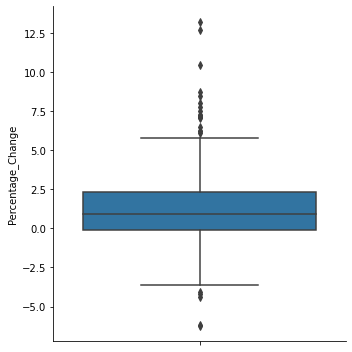

In [83]:
sns.catplot(y='Percentage_Change', data=file, kind='box')
plt.show()

> > **INTERPRETATIONS** -> This shows that most of the share's price have changed in range 0 to 2.5 & the median is around 1.

## 7. Top 5 traded Stocks with respect to Volume

In [84]:
file.sort_values(['Volume'], ascending=False, inplace=True)

In [85]:
Sort_Vol = file[['Volume','Share_Name']][:5]
Sort_Vol

,,Volume,Share_Name
Rank,Company_Name,,
135.0,Yes Bank Ltd.,820519351.0,YESBANK
146.0,Vodafone Idea Ltd.,103325255.0,IDEA
188.0,National Aluminium Company Ltd.,72085362.0,NATIONALUM
24.0,Oil and Natural Gas Corporation Ltd.,66314748.0,ONGC
112.0,Steel Authority of India Ltd.,50576391.0,SAIL


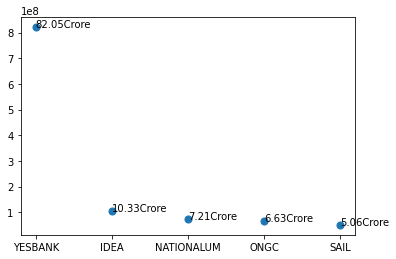

In [86]:
List_of_Tuples = Sort_Vol[['Volume','Share_Name']][:5].to_dict().items()
L = []
for i in List_of_Tuples:
    L.append(i[1].values())

for i in zip(L[1],L[0]): 
    plt.annotate(s='{:.2f}Crore'.format(i[1]/10000000),xy=i)

plt.scatter(L[1],L[0], s=50, alpha=1)
plt.show()

> > **INTERPRETATIONS** -> On 20th March 2022, the YES Bank stock have been traded the most and it's volume is 82.05 Crores i.e., 82.05 Crores shares of YES Bank have changed the hands.

## 8. A count plot in terms of the Face Value

In [87]:
file['Face_Value'].unique()

array([ 2, 10,  5,  1])

In [88]:
file[['Face_Value']].value_counts() 

Face_Value
10            195
2             129
1             104
5              42
dtype: int64

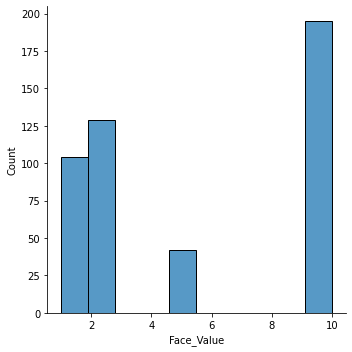

In [89]:
sns.displot(file['Face_Value'])
plt.show()

> > **INTERPRETATIONS** -> Most of the stock have the face value of ₹10 and some have the face value of ₹2 & ₹1 but a very few are having ₹5 as the face value.

## 9. Sort the companies with respect to Sectors and draw a line graph of High_52, Low_52 & Current_Price of bottom 3 companies with respect to Volume

In [90]:
file.sort_values(['Volume'], ascending=False, inplace=True)

In [91]:
Sort_Vol = file[['Volume','Share_Name','High_52','Low_52','Current_Price']][-5:]
Sort_Vol

,,Volume,Share_Name,High_52,Low_52,Current_Price
Rank,Company_Name,,,,,
125.0,Honeywell Automation Ltd.,7441.0,HONAUT,49040.0,38025.10,39412.90
409.0,VST Industries Ltd.,6174.0,VSTIND,3895.0,2794.00,3062.30
340.0,Sundaram-Clayton Ltd.,2823.0,SUNCLAYLTD,5097.7,2830.45,3620.45
394.0,Esab India Ltd.,2783.0,ESABINDIA,3615.0,1760.00,3316.60
461.0,Tasty Bite Eatables Ltd.,1706.0,TASTYBITE,21487.0,10510.50,11113.05


In [92]:
List_of_Tuples = Sort_Vol[['Volume','Share_Name','High_52','Low_52','Current_Price']][:5].to_dict().items()
L = []
for i in List_of_Tuples:
    L.append(i[1].values())

In [93]:
Names = L[1]
high52 = L[2]
low52 = L[3]
CP = L[4]

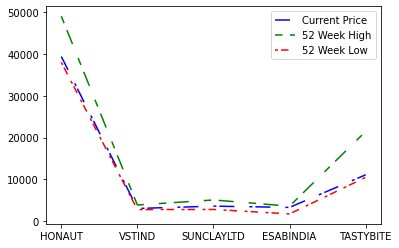

In [94]:
fig, ax = plt.subplots()

current_price, = ax.plot(Names, CP, color='Blue')
current_price.set_label('Current Price')
current_price.set_dashes([10,10,2,2]) # 10 dashes 10 spaces 2 dashes 2 spaces

High_52, = ax.plot(Names, high52, color='Green') 
High_52.set_label('52 Week High')
High_52.set_dashes([5,5,10,10]) # 5 dashes 5 spaces 10 dashes 10 spaces

Low_52, = ax.plot(Names, low52, color='Red') 
Low_52.set_label('52 Week Low')
Low_52.set_dashes([2,2,5,5]) # 2 dashes 2 spaces 5 dashes 5 spaces

plt.legend()
plt.show()

> > **INTERPRETATIONS** -> There has not been any considerable alteration in the prices since the last 52 weeks i.e, 1 year.

## 10. Groupby Sectors with respect to Percentage Change then tell which one has

- Gained most
- Lost most

In [95]:
Groupby_Sectors = file.groupby(by=["Sector"]).mean()

In [96]:
Groupby_Sectors.sort_values(['Percentage_Change'], ascending=False, inplace=True)

In [97]:
Groupby_Sectors[['Percentage_Change']]

,Percentage_Change
Sector,
Cables - Power & Others,6.74
Auto Ancillaries - Castings/Forgings,6.21
Construction - Residential & Commercial Complexes,5.09
Gas Distribution,4.85
Steel - Medium & Small,4.34
...,...
Textiles - Spinning - Cotton Blended,-1.68
Vanaspati & Oils,-1.73
Paper,-1.96


> **Most Gained**

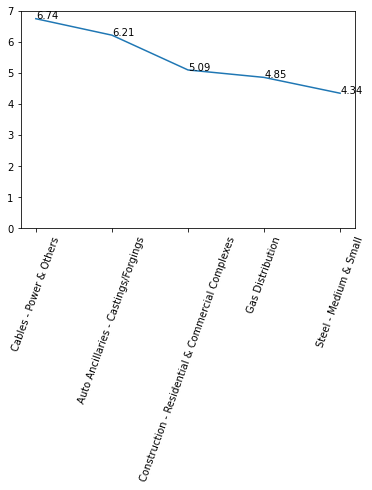

In [98]:
plt.plot(Groupby_Sectors.Percentage_Change[:5]) 
plt.xticks(rotation = 70)
label = np.arange(7,-1,-1) 
plt.yticks(label,['7','6','5','4','3','2','1','0'])

List_of_Tuples = Groupby_Sectors['Percentage_Change'][:5].to_dict().items()
for i in List_of_Tuples:
    plt.annotate('{:.2f}'.format(i[1]),i)

plt.show()

> **Most Lost**

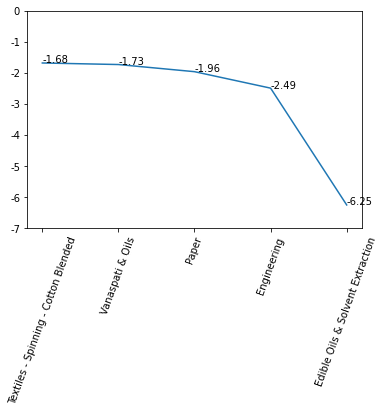

In [99]:
plt.plot(Groupby_Sectors.Percentage_Change[-5:]) 
plt.xticks(rotation = 70)
label = np.arange(-7,1,1) 
plt.yticks(label,['-7','-6','-5','-4','-3','-2','-1','0'])

List_of_Tuples = Groupby_Sectors['Percentage_Change'][-5:].to_dict().items()
for i in List_of_Tuples:
    plt.annotate('{:.2f}'.format(i[1]),i)

plt.show()

## 11. Add feature named type of Firm_Type
- Blue Chip – Market capitalization > 10,00,000 crores
- Large caps – Market capitalization > 10,000 crores
- Mid caps– Market capitalization between 500 crores to 10,000 crores 

In [100]:
file['Firm_Type'] = file.Market_Capital.apply(lambda C : 'Blue Chip' if C>500000 
                                             else ('Large Cap' if (C>10000 and C<500000) else 'Mid Cap')) 

In [101]:
file

,,Sector,Share_Name,Current_Price,Price_Change,Percentage_Change,Opening_Price,Previous_Close,Volume,High,Low,Upper_Circuit,Lower_Circuit,High_52,Low_52,Face_Value,Market_Capital,State,Website,Firm_Type
Rank,Company_Name,,,,,,,,,,,,,,,,,,,
135.0,Yes Bank Ltd.,Banks - Private Sector,YESBANK,12.95,0.15,1.17,12.90,12.80,820519351.0,13.40,12.25,15.35,10.25,16.85,10.50,2,32446,Maharashtra,http://www.kfintech.com,Large Cap
146.0,Vodafone Idea Ltd.,Telecommunications - Service,IDEA,10.25,-0.05,-0.49,10.45,10.30,103325255.0,10.50,10.20,11.30,9.30,16.80,4.55,10,29454,Gujarat,http://www.bigshareonline.com,Large Cap
188.0,National Aluminium Company Ltd.,Aluminium,NATIONALUM,116.75,-0.25,-0.21,118.20,117.00,72085362.0,118.90,112.50,128.70,105.30,132.70,50.70,5,21443,Orissa,http://www.kfintech.com,Large Cap
24.0,Oil and Natural Gas Corporation Ltd.,Oil Drilling And Exploration,ONGC,170.30,3.00,1.79,166.60,167.30,66314748.0,171.50,164.60,184.00,150.60,194.95,97.45,5,214242,Delhi,http://www.kfintech.com,Large Cap
112.0,Steel Authority of India Ltd.,Steel - Large,SAIL,98.10,0.90,0.93,98.80,97.20,50576391.0,100.00,97.20,106.90,87.50,151.30,67.10,10,40520,Delhi,http://www.mcsregistrars.com,Large Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125.0,Honeywell Automation Ltd.,Telecommunications - Equipment,HONAUT,39412.90,-548.80,-1.37,40298.00,39961.70,7441.0,40852.95,38850.00,43957.85,35965.55,49040.00,38025.10,10,34847,Maharashtra,https://www.tcplindia.co.in,Large Cap
409.0,VST Industries Ltd.,Cigarettes,VSTIND,3062.30,-0.40,-0.01,3059.00,3062.70,6174.0,3118.45,3023.35,3675.20,2450.20,3895.00,2794.00,10,4729,Telangana,http://www.kfintech.com,Mid Cap
340.0,Sundaram-Clayton Ltd.,Auto Ancillaries,SUNCLAYLTD,3620.45,21.90,0.61,3629.95,3598.55,2823.0,3629.95,3585.55,4318.25,2878.85,5097.70,2830.45,5,7325,Tamil Nadu,http://www.sundaram-clayton.com,Mid Cap


> Make a pie chart of the value counts of Firm Type

In [102]:
file['Firm_Type'].value_counts() 

Large Cap    284
Mid Cap      181
Blue Chip      5
Name: Firm_Type, dtype: int64

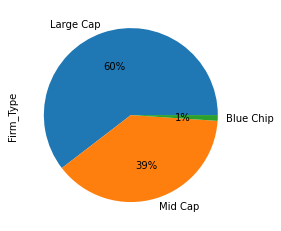

In [103]:
file.Firm_Type.value_counts().plot.pie(autopct='%.0f%%')
plt.show()

> > **INTERPRETATIONS** -> The dataframe contains only 1% Blue Chip firms but has 60% Large and 39% Mid caps Firms

## 12. Add a column named as UP/DOWN then make a Swarm Plot on Volume & Market_Capital with hue = UP/DOWN after grouping the Sectors

###### **If Price_Change > 0 then return UP else return False**

> **Groupby Sectors**

In [104]:
Groupby_Sectors = file.groupby(by=["Sector"]).mean()

In [105]:
Groupby_Sectors.head()

,Current_Price,Price_Change,Percentage_Change,Opening_Price,Previous_Close,Volume,High,Low,Upper_Circuit,Lower_Circuit,High_52,Low_52,Face_Value,Market_Capital
Sector,,,,,,,,,,,,,,
Abrasives,1306.925,-2.400,-0.230,1321.30,1309.325,974625.5,1387.000,1280.825,1571.175,1047.475,1526.675,626.875,3.0,17540.5
Aluminium,116.750,-0.250,-0.210,118.20,117.000,72085362.0,118.900,112.500,128.700,105.300,132.700,50.700,5.0,21443.0
Aquaculture,430.250,3.650,0.860,435.00,426.600,440271.0,436.300,426.200,511.900,341.300,674.850,410.000,1.0,5862.0
Auto - 2 & 3 Wheelers,2261.460,26.890,0.760,2250.07,2234.570,476766.0,2284.550,2230.030,2550.490,1918.650,3095.770,2005.390,6.6,40742.2
Auto - Cars & Jeeps,4243.700,113.975,2.725,4179.50,4129.725,2460456.0,4270.925,4153.500,4542.675,3716.775,5014.500,3535.575,5.0,165574.5


> **Adding column 'UP/DOWN'**

In [106]:
Groupby_Sectors['UP/DOWN'] = Groupby_Sectors.Price_Change.apply(lambda PC : 'UP' if PC>=0 else 'DOWN')

In [107]:
Groupby_Sectors['UP/DOWN'].value_counts()

UP      83
DOWN    23
Name: UP/DOWN, dtype: int64

In [108]:
Groupby_Sectors.sort_values(['Market_Capital'], ascending=False).head()

,Current_Price,Price_Change,Percentage_Change,Opening_Price,Previous_Close,Volume,High,Low,Upper_Circuit,Lower_Circuit,High_52,Low_52,Face_Value,Market_Capital,UP/DOWN
Sector,,,,,,,,,,,,,,,
Refineries,676.408333,14.550000,0.556667,669.316667,661.858333,9.581988e+06,682.575000,662.900000,728.716667,595.000000,848.808333,538.775,10.000000,321104.833333,UP
Computers - Software,3043.794118,26.105882,0.584118,3061.011765,3017.688235,2.735390e+06,3094.064706,3000.108824,3387.467647,2647.908824,3699.320588,1690.050,5.294118,199732.294118,UP
Gas Distribution,1766.800000,81.700000,4.850000,1701.250000,1685.100000,7.060120e+05,1769.350000,1682.250000,1769.350000,1600.850000,1987.100000,671.000,1.000000,194314.000000,UP
Banks - Private Sector,633.025000,9.762500,1.150833,633.454167,623.262500,7.626121e+07,641.245833,627.212500,686.270833,560.254167,783.758333,533.500,5.416667,178224.166667,UP
Auto - Cars & Jeeps,4243.700000,113.975000,2.725000,4179.500000,4129.725000,2.460456e+06,4270.925000,4153.500000,4542.675000,3716.775000,5014.500000,3535.575,5.000000,165574.500000,UP


> **Swarm Plot**

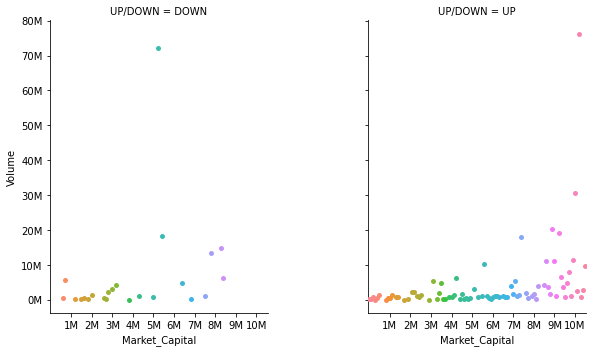

In [109]:
sns.catplot(x='Market_Capital', y='Volume', kind='swarm', col='UP/DOWN', data=Groupby_Sectors, aspect=0.9) 

label_y = np.arange(0,90000000,10000000) 
plt.yticks(label_y,['0M','10M','20M','30M','40M','50M','60M','70M','80M'])

label_x = np.arange(10,110,10) 
plt.xticks(label_x,['1M','2M','3M','4M','5M','6M','7M','8M','9M','10M'])

plt.show()

> > **INTERPRETATIONS** -> Most of the sector's shares have gained but and the companies with the larger capital i.e., greater that 8 million have only gained.

## 13. Histogram of Percentage Change

In [110]:
file['Percentage_Change']

Rank   Company_Name                        
135.0  Yes Bank Ltd.                           1.17
146.0  Vodafone Idea Ltd.                     -0.49
188.0  National Aluminium Company Ltd.        -0.21
24.0   Oil and Natural Gas Corporation Ltd.    1.79
112.0  Steel Authority of India Ltd.           0.93
                                               ... 
125.0  Honeywell Automation Ltd.              -1.37
409.0  VST Industries Ltd.                    -0.01
340.0  Sundaram-Clayton Ltd.                   0.61
394.0  Esab India Ltd.                        -1.19
461.0  Tasty Bite Eatables Ltd.                0.37
Name: Percentage_Change, Length: 470, dtype: float64

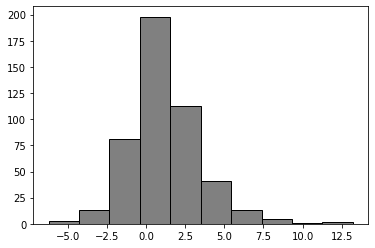

In [111]:
plt.hist(file['Percentage_Change'], bins = 10, color = 'grey', edgecolor = 'black') 
plt.show()

> > **INTERPRETATIONS** -> Most of the stock's price have increased but that change is minimal.

## 14. Sort the values with respect to rank and then make a violin plot of Opening Price and Current Price of top 10 firms

In [112]:
file.sort_values(['Rank'], ascending=False, inplace=True)

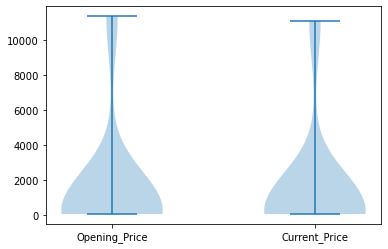

In [113]:
plt.violinplot([file['Opening_Price'][:10], file['Current_Price'][:10]])
plt.xticks((1,2),["Opening_Price", "Current_Price"])
plt.show()

> > **INTERPRETATIONS** -> When we see the violin plot, we can conclude that there has been no big change in the share price of top 10 firms in terms of market capital.

## 15. Pair Plot

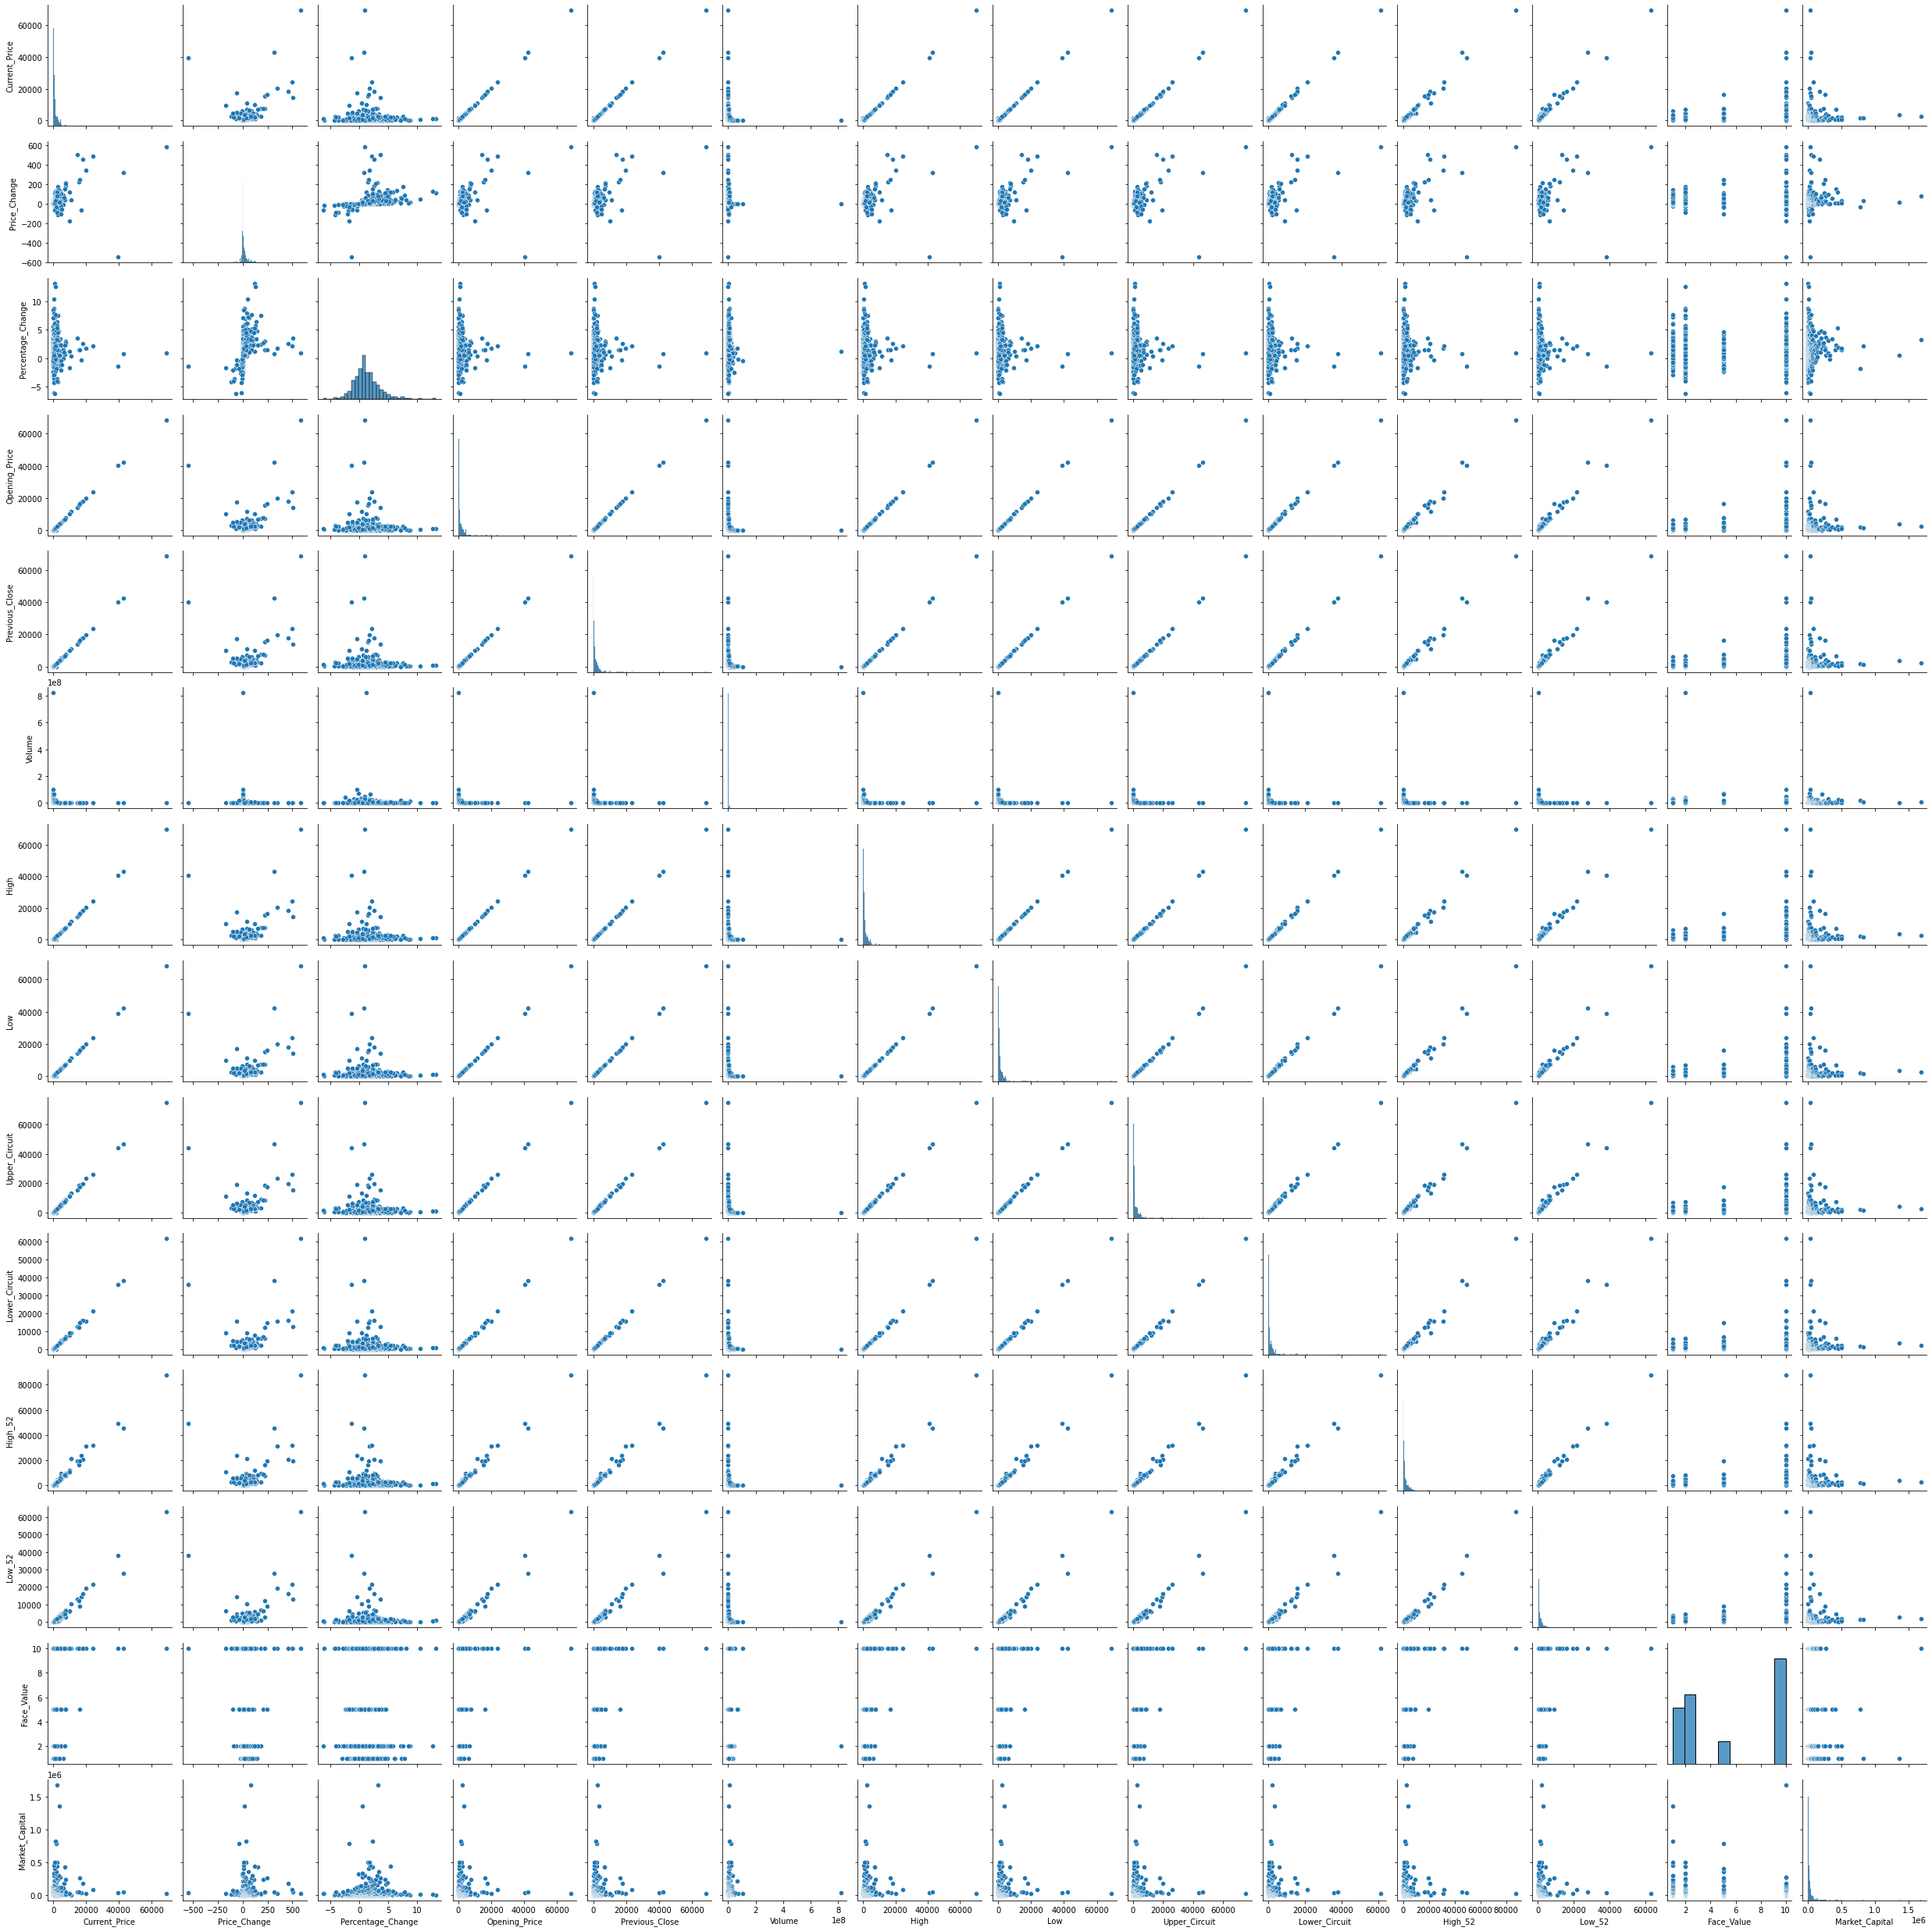

In [114]:
sns.pairplot(file)

## 16. Heat Map- Multivariate Analysis

In [115]:
corr = file.corr()

In [116]:
corr.fillna(corr.mean(), inplace=True)

Text(0.5, 1.0, 'Corelation')

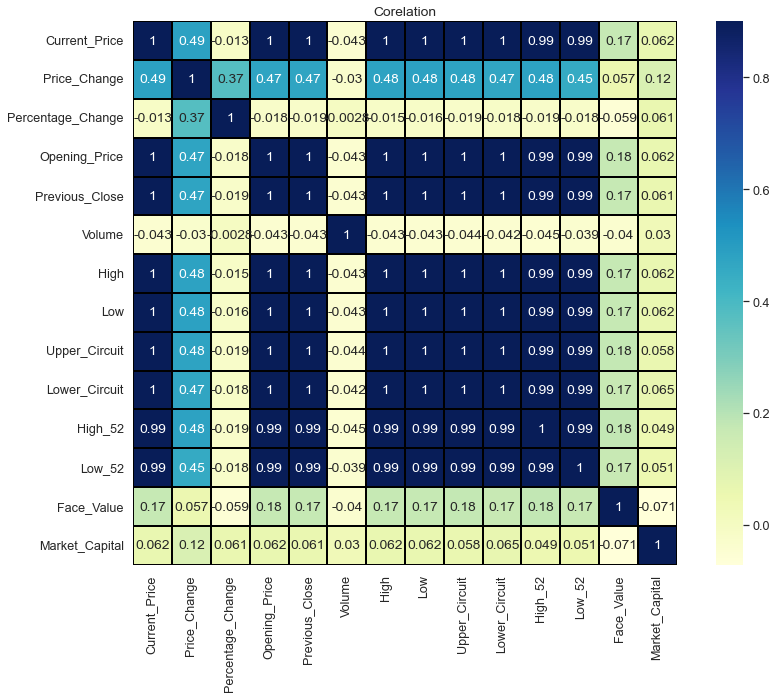

In [117]:
sns.set(font_scale=1.15) 
plt.figure(figsize=(14, 10)) 
sns.heatmap(corr, vmax=0.9, linewidths=0.02,
            square=True, 
            annot=True, 
            cmap='YlGnBu', 
            linecolor="black")
plt.title('Corelation')